# **Emotion Detection**

# Importing Library

In [79]:
 
import pandas as pd  
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np  
import matplotlib.pyplot as plt
import tensorflow as tf   
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D  
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam   
from keras.regularizers import l2  
from keras.utils import np_utils 

from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2  as cv



# **Loading Data**

In [80]:
df = pd.read_csv('/content/drive/MyDrive/WISE_ML/fer2013.csv')


In [81]:
print (df)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


# **Splitting training and testing data**

In [82]:
X_train,train_y,X_test,test_y=[],[],[],[] 

In [83]:
for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    try:  
        if 'Training' in row['Usage']:  
           X_train.append(np.array(val,'float32'))  
           train_y.append(row['emotion'])  
        elif 'PublicTest' == row['Usage']  or 'PrivateTest' == row ['Usage']:  
           X_test.append(np.array(val,'float32'))  
           test_y.append(row['emotion'])
        
    except:  
        print(f"error occured at index :{index} and row:{row}")  

# **Reshaping training and testing data**

In [85]:
num_labels = 7  
batch_size = 120
epochs = 100 
width, height = 48, 48

In [86]:
X_train = np.array(X_train,'float32')  
train_y = np.array(train_y,'float32')  
X_test = np.array(X_test,'float32')  
test_y = np.array(test_y,'float32') 

In [87]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)  
test_y=np_utils.to_categorical(test_y, num_classes=num_labels) 

In [88]:
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)

In [89]:
X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)

In [90]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  
  
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)  

# **Model Building**

In [91]:
model = Sequential()
#layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1),padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer 3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer4 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

# **Compiling the data**

In [92]:
model.compile(loss=categorical_crossentropy,  
              optimizer=Adam(),  
              metrics=['accuracy'])  
  

In [93]:
 early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

# **Training the data**

In [94]:
history = model.fit(np.array(X_train), np.array(train_y),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_test), np.array(test_y)),
          callbacks=[early_stopping],
          shuffle=True)

Epoch 1/100
240/240 [==============================] - 5s 15ms/step - loss: 1.8161 - accuracy: 0.2412 - val_loss: 1.6622 - val_accuracy: 0.3437
Epoch 2/100
240/240 [==============================] - 3s 13ms/step - loss: 1.6467 - accuracy: 0.3480 - val_loss: 1.4666 - val_accuracy: 0.4411
Epoch 3/100
240/240 [==============================] - 3s 13ms/step - loss: 1.5063 - accuracy: 0.4075 - val_loss: 1.3739 - val_accuracy: 0.4785
Epoch 4/100
240/240 [==============================] - 3s 14ms/step - loss: 1.4435 - accuracy: 0.4464 - val_loss: 1.3115 - val_accuracy: 0.4978
Epoch 5/100
240/240 [==============================] - 3s 13ms/step - loss: 1.3584 - accuracy: 0.4786 - val_loss: 1.2714 - val_accuracy: 0.5075
Epoch 6/100
240/240 [==============================] - 3s 13ms/step - loss: 1.3218 - accuracy: 0.4942 - val_loss: 1.2408 - val_accuracy: 0.5215
Epoch 7/100
240/240 [==============================] - 3s 13ms/step - loss: 1.2845 - accuracy: 0.5128 - val_loss: 1.2191 - val_accuracy:

# **Accuracy**

In [95]:
scores = model.evaluate(X_test, test_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 61.99%


# **Plotting Graph**

In [96]:
%matplotlib inline

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

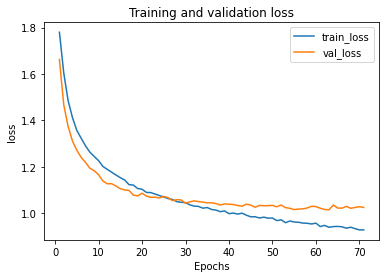

In [97]:
plot_metric(history, 'loss') 

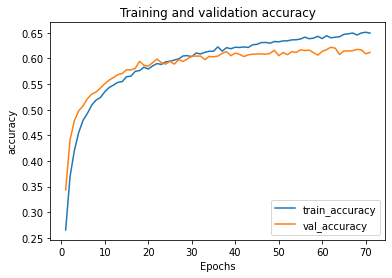

In [98]:
plot_metric(history, 'accuracy') 

# **Saving the model**

In [99]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
 json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# **OpenCV**

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from keras.models import model_from_json
import cv2,time
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
 
  display(Image(filename))
except Exception as err:
 
  print(str(err))